In [1]:
# import pandas as pd
# import glob

# # Replace with the actual base directory containing your data
# base_dir = "C://Users/hp/data/"

# # Construct the glob pattern
# file_pattern = f"{base_dir}/**/location-*.csv.gz"

# # Find all matching files
# file_list = glob.glob(file_pattern, recursive=True)

# # List to hold individual DataFrames
# data_frames = []

# # Read each file and append to the list
# for file in file_list:
#     df = pd.read_csv(file, compression='gzip')
#     data_frames.append(df)

# # Concatenate all DataFrames into a single DataFrame
# all_data = pd.concat(data_frames, ignore_index=True)

# # Save the concatenated DataFrame to a single CSV file
# output_file = "C://Users/hp/combined_data.csv"
# all_data.to_csv(output_file, index=False)

# # Print the confirmation message
# print(f"Combined data has been saved to {output_file}")


In [16]:
import pandas as pd

# Load data
data = pd.read_csv('D://OpenAQtask/combined_data.csv')
data

,location_id,sensors_id,location,datetime,lat,lon,parameter,units,value
0,2178,3919,Del Norte-2178,2020-01-01T01:00:00-07:00,35.1353,-106.584702,pm10,µg/m³,7.000
1,2178,3919,Del Norte-2178,2020-01-01T02:00:00-07:00,35.1353,-106.584702,pm10,µg/m³,8.000
2,2178,3919,Del Norte-2178,2020-01-01T03:00:00-07:00,35.1353,-106.584702,pm10,µg/m³,7.000
3,2178,3919,Del Norte-2178,2020-01-01T04:00:00-07:00,35.1353,-106.584702,pm10,µg/m³,8.000
4,2178,3919,Del Norte-2178,2020-01-01T05:00:00-07:00,35.1353,-106.584702,pm10,µg/m³,8.000
...,...,...,...,...,...,...,...,...,...
42784,2178,3917,Del Norte-2178,2020-12-31T20:00:00-07:00,35.1353,-106.584702,o3,ppm,0.006
42785,2178,3917,Del Norte-2178,2020-12-31T21:00:00-07:00,35.1353,-106.584702,o3,ppm,0.003
42786,2178,3917,Del Norte-2178,2020-12-31T22:00:00-07:00,35.1353,-106.584702,o3,ppm,0.020
42787,2178,3917,Del Norte-2178,2020-12-31T23:00:00-07:00,35.1353,-106.584702,o3,ppm,0.023


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called data
# Convert to UTC, then remove timezone information
data['datetime'] = pd.to_datetime(data['datetime'], utc=True)
data['datetime'] = data['datetime'].dt.tz_localize(None)


In [4]:
unique_values = data['parameter'].unique()
print(unique_values)


['pm10' 'pm25' 'no2' 'co' 'so2' 'o3']


In [5]:
# Set 'datetime' as the index
data = data.set_index('datetime')

# Filter for PM25 parameter
data = data[data['parameter'] == 'pm25']


In [6]:
data.head()

,location_id,sensors_id,location,lat,lon,parameter,units,value
datetime,,,,,,,,
2020-01-01 08:00:00,2178,3920,Del Norte-2178,35.1353,-106.584702,pm25,µg/m³,4.4
2020-01-01 09:00:00,2178,3920,Del Norte-2178,35.1353,-106.584702,pm25,µg/m³,4.1
2020-01-01 10:00:00,2178,3920,Del Norte-2178,35.1353,-106.584702,pm25,µg/m³,4.3
2020-01-01 11:00:00,2178,3920,Del Norte-2178,35.1353,-106.584702,pm25,µg/m³,4.8
2020-01-01 12:00:00,2178,3920,Del Norte-2178,35.1353,-106.584702,pm25,µg/m³,4.5


In [21]:
data.to_csv('D://OpenAQtask/pm25data.csv')

In [7]:
print('Null values before handling:')
print(data.isnull().sum())
# Check for missing values
print("Missing values before handling:")
print(data.isna().sum())


Null values before handling:
location_id    0
sensors_id     0
location       0
lat            0
lon            0
parameter      0
units          0
value          0
dtype: int64
Missing values before handling:
location_id    0
sensors_id     0
location       0
lat            0
lon            0
parameter      0
units          0
value          0
dtype: int64


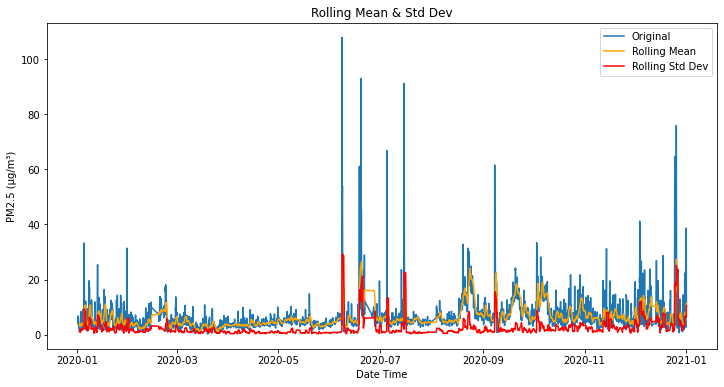

In [8]:
# Calculate rolling mean and standard deviation
rolling_mean = data['value'].rolling(window=24).mean()  # 24-hour window, adjust as needed
rolling_std = data['value'].rolling(window=24).std()

# Plot the rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['value'], label='Original')
plt.plot(data.index, rolling_mean, label='Rolling Mean', color='orange')
plt.plot(data.index, rolling_std, label='Rolling Std Dev', color='red')
plt.xlabel('Date Time')
plt.ylabel('PM2.5 (µg/m³)')
plt.title('Rolling Mean & Std Dev')
plt.legend()
plt.show()


In [9]:
import numpy as np
import pandas as pd

# Assume `data` is your DataFrame and 'value' is the column of interest
data['value_diff'] = data['value'].diff()
abrupt_changes = data[abs(data['value_diff']) > data['value_diff'].mean() + 3 * data['value_diff'].std()]

# Step 1: Check for outliers
mean_value = data['value'].mean()
std_value = data['value'].std()
outliers = data[abs(data['value'] - mean_value) > 3 * std_value]

# Step 2: Replace outliers with the median value
median_value = data['value'].median()
data['value'] = np.where(abs(data['value'] - mean_value) > 3 * std_value, median_value, data['value'])

# Print the first few rows of the data before and after handling outliers
print("\nData before handling outliers:")
outliers.head(5)


Data before handling outliers:


,location_id,sensors_id,location,lat,lon,parameter,units,value,value_diff
datetime,,,,,,,,,
2020-01-05 03:00:00,2178,3920,Del Norte-2178,35.1353,-106.584702,pm25,µg/m³,25.6,2.5
2020-01-05 04:00:00,2178,3920,Del Norte-2178,35.1353,-106.584702,pm25,µg/m³,26.2,0.6
2020-01-05 05:00:00,2178,3920,Del Norte-2178,35.1353,-106.584702,pm25,µg/m³,33.3,7.1
2020-01-13 06:00:00,2178,3920,Del Norte-2178,35.1353,-106.584702,pm25,µg/m³,25.4,3.8
2020-01-30 23:00:00,2178,3920,Del Norte-2178,35.1353,-106.584702,pm25,µg/m³,31.4,28.9


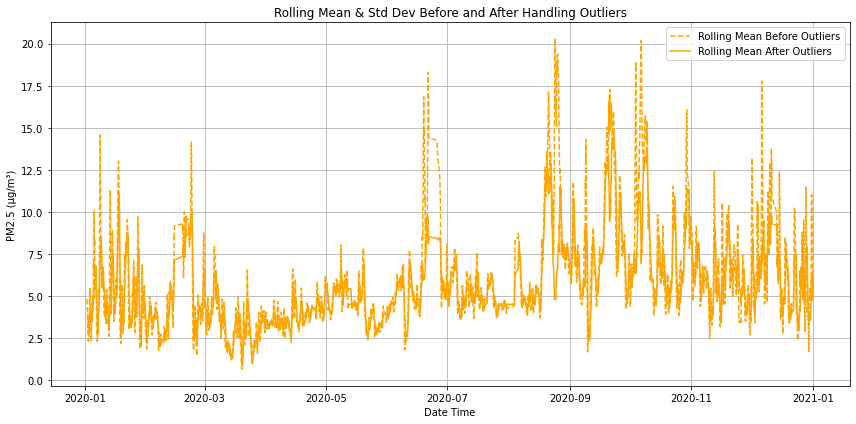

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Calculate rolling statistics before handling outliers
rolling_mean_before = data['value'].rolling(window=12).mean()
rolling_std_before = data['value'].rolling(window=12).std()

# Detect outliers
mean_value = data['value'].mean()
std_value = data['value'].std()
outliers = data[abs(data['value'] - mean_value) > 3 * std_value]

# Replace outliers with the median value
median_value = data['value'].median()
data['value'] = np.where(abs(data['value'] - mean_value) > 3 * std_value, median_value, data['value'])

# Step 2: Calculate rolling statistics after handling outliers
rolling_mean_after = data['value'].rolling(window=24).mean()
rolling_std_after = data['value'].rolling(window=24).std()

# Step 3: Plot the rolling statistics before and after handling outliers on the same plot
plt.figure(figsize=(12, 6))

# Plot rolling mean and std deviation before handling outliers
plt.plot(data.index, rolling_mean_before, label='Rolling Mean Before Outliers', color='orange', linestyle='--')
#plt.plot(data.index, rolling_std_before, label='Rolling Std Dev Before Outliers', color='red', linestyle='--')

# Plot rolling mean and std deviation after handling outliers
plt.plot(data.index, rolling_mean_after, label='Rolling Mean After Outliers', color='orange')
#plt.plot(data.index, rolling_std_after, label='Rolling Std Dev After Outliers', color='red')

plt.xlabel('Date Time')
plt.ylabel('PM2.5 (µg/m³)')
plt.title('Rolling Mean & Std Dev Before and After Handling Outliers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
data.head()

,location_id,sensors_id,location,lat,lon,parameter,units,value,value_diff
datetime,,,,,,,,,
2020-01-01 08:00:00,2178,3920,Del Norte-2178,35.1353,-106.584702,pm25,µg/m³,4.4,NaN
2020-01-01 09:00:00,2178,3920,Del Norte-2178,35.1353,-106.584702,pm25,µg/m³,4.1,-0.3
2020-01-01 10:00:00,2178,3920,Del Norte-2178,35.1353,-106.584702,pm25,µg/m³,4.3,0.2
2020-01-01 11:00:00,2178,3920,Del Norte-2178,35.1353,-106.584702,pm25,µg/m³,4.8,0.5
2020-01-01 12:00:00,2178,3920,Del Norte-2178,35.1353,-106.584702,pm25,µg/m³,4.5,-0.3


In [14]:
data.drop(columns=['value_diff','location_id','sensors_id','location','lat','lon','units'], inplace=True)
data['value'] = data['value'].interpolate(method='nearest')

In [15]:
data

,parameter,value
datetime,,
2020-01-01 08:00:00,pm25,4.4
2020-01-01 09:00:00,pm25,4.1
2020-01-01 10:00:00,pm25,4.3
2020-01-01 11:00:00,pm25,4.8
2020-01-01 12:00:00,pm25,4.5
...,...,...
2021-01-01 03:00:00,pm25,4.8
2021-01-01 04:00:00,pm25,4.8
2021-01-01 05:00:00,pm25,14.3
